In [1]:
pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


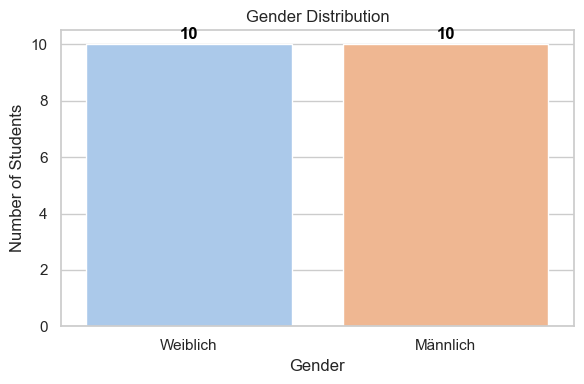

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Load CSV
df = pd.read_csv("Kursevaluation_12052025.csv")

# Set style
sns.set(style="whitegrid")

# Calculate absolute number
def absolute_value(val):
    total = sum(course_source_counts)
    absolute = int(round(val / 100 * total))
    return f'{absolute}' 

with PdfPages('evaluation.pdf') as pdf:

    # 1. Semester Distribution (Line Plot)
    semester_counts = df['Semester'].value_counts().sort_index()
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=semester_counts.index, y=semester_counts.values, marker="o")
    plt.title("Semester Distribution")
    plt.xlabel("Semester")
    plt.ylabel("Number of Students")
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # 2. Gender Distribution (Bar Chart)
    gender_counts = df['Geschlecht'].value_counts()
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel", hue=gender_counts.index, legend=False)
    # Add numbers above the bars
    for i, v in enumerate(gender_counts.values):
        ax.text(i, v + 0.2, str(v), color='black', ha='center', fontweight='bold')
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Number of Students")
    plt.tight_layout()
    pdf.savefig()
        
    # 3. Faculty Distribution (Bar Chart)
    # First replace values in the DataFrame
    df['Fakultät'] = df['Fakultät'].replace({
        'B (Biotechnologie)': 'B',
        'N (Informationstechnik)': 'N',
        'M (Maschinenbau)': 'M',
        'I (Informatik)': 'I',
        'E (Elektrotechnik)': 'E',
    })
    faculty_counts = df['Fakultät'].value_counts()
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=faculty_counts.index, y=faculty_counts.values, palette="muted", hue=faculty_counts.index, legend=False)
    for i, v in enumerate(faculty_counts.values):
        ax.text(i, v + 0.2, str(v), color='black', ha='center', fontweight='bold')
    plt.title("Faculty Distribution")
    plt.xlabel("Faculty")
    plt.ylabel("Number of Students")
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # 4. Course Discovery (Pie Chart)
    course_source_counts = df['Wie hast du von diesem Kurs erfahren?'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(course_source_counts, labels=course_source_counts.index, autopct=absolute_value, startangle=140)
    plt.title("How Did Students Hear About the Course?")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

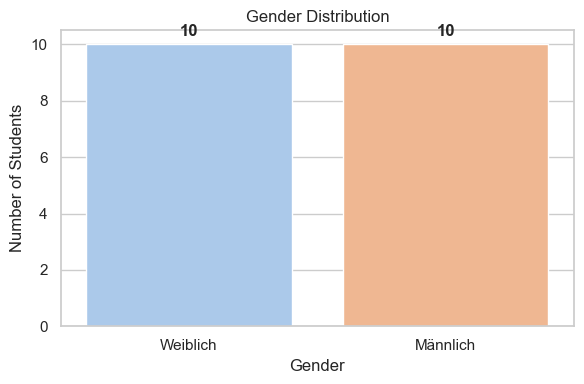

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Plot directly from df, set hue to 'Geschlecht' to apply the palette
ax = sns.countplot(data=df, x='Geschlecht', palette='pastel', hue='Geschlecht', legend=False)

# Add numbers above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, int(height),
            ha="center", va="bottom", fontweight='bold')

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()


In [10]:
print(df['Fakultät']) 



print(df['Fakultät']) 

0                      B
1                      N
2                      N
3                      M
4                      B
5                      I
6                      M
7                      B
8                      B
9                      B
10                     M
11                     B
12                     B
13                     I
14    E (Elektrotechnik)
15                     B
16                     M
17                     I
18                     B
19                     M
Name: Fakultät, dtype: object
0     B
1     N
2     N
3     M
4     B
5     I
6     M
7     B
8     B
9     B
10    M
11    B
12    B
13    I
14    E
15    B
16    M
17    I
18    B
19    M
Name: Fakultät, dtype: object
